## 3.3.2 Random Search

Random Search is an alternative hyperparameter optimization technique that randomly samples a specified number of hyperparameter combinations from the hyperparameter space. Unlike Grid Search, which exhaustively tries all possible combinations, Random Search explores the hyperparameter space more efficiently by focusing on a random subset. This approach is particularly useful when the search space is large or when computational resources are limited.

### Random Search Algorithm Steps

1. **Define the Hyperparameter Space**: Specify a range or distribution for each hyperparameter to be tuned.

2. **Random Sampling**: Randomly select a fixed number of hyperparameter combinations from the defined space.

3. **Build and Evaluate Models**: For each sampled combination, build a model and evaluate its performance using cross-validation.

4. **Select the Best Model**: Identify the combination of hyperparameters that results in the best performance according to a specified metric (e.g., accuracy, F1 score).

Random Search is often more efficient than Grid Search because it can find good hyperparameters faster by exploring a wider variety of combinations.

### Implementation

We will implement Random Search to optimize hyperparameters for two different classifiers: Decision Tree and Logistic Regression on a classification dataset. The hyperparameters to be tuned include the maximum depth (`max_depth`), criterion (`criterion`), minimum samples split (`min_samples_split`), and minimum samples leaf (`min_samples_leaf`) for the Decision Tree, and the regularization parameter `C`, penalty type (`penalty`), and solver (`solver`) for Logistic Regression.


<hr><hr>

## 1. Decision Tree

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
import warnings

# Turn off warnings
warnings.filterwarnings("ignore")

In [3]:
# Generate synthetic classification data with more decisive separation
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=2.0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Define the parameter space for Decision Tree
param_dist_tree = {
    'max_depth': np.arange(1, 20),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20)
}

In [5]:
# Initialize the Decision Tree classifier
tree = DecisionTreeClassifier()

# Initialize the Random Search for Decision Tree
random_search_tree = RandomizedSearchCV(tree, param_dist_tree, n_iter=50, cv=5, scoring='accuracy', random_state=42)

# Perform Random Search for Decision Tree
random_search_tree.fit(X_train, y_train)

# Best hyperparameters for Decision Tree
best_params_tree = random_search_tree.best_params_
print(f"Best Parameters for Decision Tree: {best_params_tree}")

Best Parameters for Decision Tree: {'min_samples_split': 18, 'min_samples_leaf': 5, 'max_depth': 3, 'criterion': 'entropy'}


In [6]:
# Train the model with the best hyperparameters for Decision Tree
best_tree = random_search_tree.best_estimator_

# Predict on the test set for Decision Tree
y_pred_tree = best_tree.predict(X_test)

# Evaluate the model for Decision Tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Test Set Accuracy: {accuracy_tree}")

Decision Tree Test Set Accuracy: 0.95


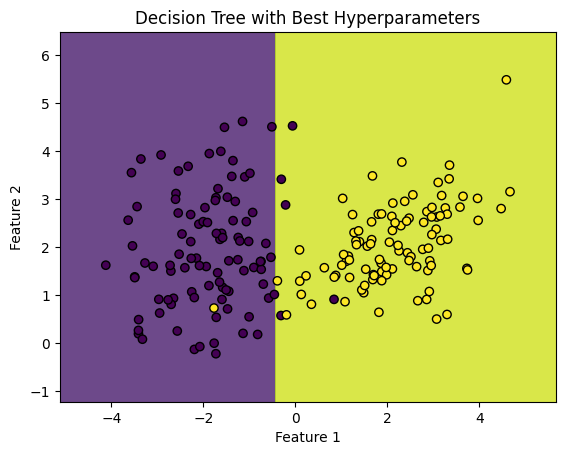

In [7]:
# Visualization of the decision boundary for Decision Tree

# Create a mesh grid for plotting
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundary for Decision Tree
Z_tree = best_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z_tree = Z_tree.reshape(xx.shape)
plt.contourf(xx, yy, Z_tree, alpha=0.8)

# Plot training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title('Decision Tree with Best Hyperparameters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

<hr><hr>

## 2. Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
# Define the parameter space for Logistic Regression
param_dist_logreg = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
    
}

In [10]:
# Initialize the Logistic Regression classifier
logreg = LogisticRegression(max_iter= 1000)

# Initialize the Random Search for Logistic Regression
random_search_logreg = RandomizedSearchCV(logreg, param_dist_logreg, n_iter=50, cv=5, scoring='accuracy', random_state=42)

# Perform Random Search for Logistic Regression
random_search_logreg.fit(X_train, y_train)

# Best hyperparameters for Logistic Regression
best_params_logreg = random_search_logreg.best_params_
print(f"Best Parameters for Logistic Regression: {best_params_logreg}")

Best Parameters for Logistic Regression: {'solver': 'saga', 'penalty': 'l2', 'C': 0.23357214690901212}


In [11]:
# Train the model with the best hyperparameters for Logistic Regression
best_logreg = random_search_logreg.best_estimator_

# Predict on the test set for Logistic Regression
y_pred_logreg = best_logreg.predict(X_test)

# Evaluate the model for Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Test Set Accuracy: {accuracy_logreg}")

Logistic Regression Test Set Accuracy: 0.9833333333333333


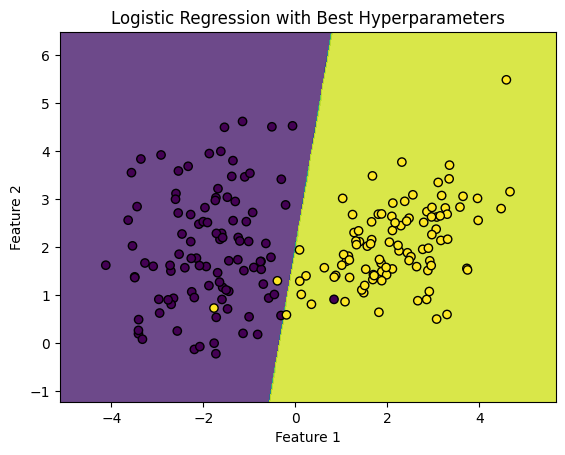

In [12]:
# Visualization of the decision boundary for Logistic Regression

# Create a mesh grid for plotting
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundary for Logistic Regression
Z_logreg = best_logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z_logreg = Z_logreg.reshape(xx.shape)
plt.contourf(xx, yy, Z_logreg, alpha=0.8)

# Plot training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title('Logistic Regression with Best Hyperparameters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Conclusion

Random Search is an effective hyperparameter optimization technique, especially when dealing with large search spaces or limited computational resources. By randomly sampling a subset of hyperparameter combinations, Random Search can find good hyperparameters more efficiently than Grid Search. In our example, we used Random Search to optimize hyperparameters for both Decision Tree and Logistic Regression models on a synthetic classification dataset. The results showed improved model performance, demonstrating the practical benefits of Random Search for hyperparameter tuning.
